In [1]:
import numpy as np
from sklearn.datasets import make_regression 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=10000, n_features=1, noise=12, random_state=42)

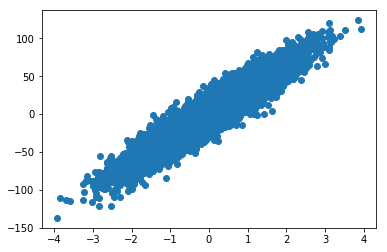

In [2]:
plt.scatter(X, y)
plt.show()

In [3]:
reg = LinearRegression().fit(X, y)
r2 = reg.score(X, y)
print('Slope: {:.3f} Intercept: {:.3f} r2: {:.3f}'.format(reg.coef_[0], reg.intercept_, r2))

Slope: 31.909 Intercept: 0.157 r2: 0.876


In [4]:
X = np.array([each[0] for each in X])
y = np.array(list(y))

In [5]:
print('First Five Elements from X: {}'.format(X[:5]))
print('First Five Elements from y: {}'.format(y[:5]))

First Five Elements from X: [-0.71657349 -0.84144951 -0.27667177 -0.01901621 -0.14451867]
First Five Elements from y: [ -9.16189546 -43.95135778 -13.22193302 -25.29354068   2.45184035]


In [6]:
def gradient_decent(X, y, m_step, b_step, epochs, lr):

    for i in range(epochs):
    
        y_pred = m_step*X + b_step
        
        #Define cost function (Root Mean Square Error)
        cost = (1/len(X))*np.sum([each**2 for each in (y-y_pred)])
        
        #Calculate derivatives for slope and intercept.
        dcost_dm = -(2/len(X))*np.sum(X*(y-y_pred))
        dcost_db = -(2/len(X))*np.sum(y-y_pred)
        
        #Updates for the slope and the intercept for the steps
        m_step = m_step-lr*dcost_dm
        b_step = b_step-lr*dcost_db
        
        #Calculate r square value
        ssr = np.sum((y_pred - y)**2)
        sst = np.sum((y - np.mean(y))**2)
        r_square = 1- (ssr/sst)

        #print('Epoch: {} Cost: {:.3f} Intercept: {:.3f} Slope: {:.3f} R2: {:.3f}'.format(i, cost, b_step, m_step, r_square))
    return (cost, m_step, b_step, r_square)

In [7]:
results = gradient_decent(X, y, m_step=0, b_step=0, epochs=1000, lr=0.1)

In [8]:
results

(144.74875657632225,
 31.908720752953005,
 0.15749279892618961,
 0.8762699435549564)